## 📦 Importing Libraries
Importing essential Python libraries for data handling and visualization.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 📥 Loading the Dataset
Loading data from a CSV file using `pandas.read_csv()`.

In [5]:
df = pd.read_csv('Salary_Data.csv')

## 👀 Previewing the Data
Displaying the first few rows to understand the structure.

In [6]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [7]:
df.shape

(6704, 6)

In [8]:
df.duplicated().sum()

np.int64(4912)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(1792, 6)

In [11]:
df.info

<bound method DataFrame.info of        Age  Gender    Education Level                  Job Title  \
0     32.0    Male         Bachelor's          Software Engineer   
1     28.0  Female           Master's               Data Analyst   
2     45.0    Male                PhD             Senior Manager   
3     36.0  Female         Bachelor's            Sales Associate   
4     52.0    Male           Master's                   Director   
...    ...     ...                ...                        ...   
6623  43.0  Female    Master's Degree  Digital Marketing Manager   
6624  27.0    Male        High School              Sales Manager   
6625  33.0  Female  Bachelor's Degree      Director of Marketing   
6628  37.0    Male  Bachelor's Degree             Sales Director   
6631  30.0  Female  Bachelor's Degree              Sales Manager   

      Years of Experience    Salary  
0                     5.0   90000.0  
1                     3.0   65000.0  
2                    15.0  150000.0  

## 🕳️ Missing Values
Checking for null values in the dataset.

In [12]:
df.isnull().sum()

Age                    1
Gender                 1
Education Level        2
Job Title              1
Years of Experience    2
Salary                 4
dtype: int64

## 🧼 Handling Missing Values
Cleaning missing data using methods like `dropna()` or `fillna()`.

In [13]:
df.dropna(inplace=True)

## 📊 Visualization
Using Matplotlib/Seaborn for insightful data visualizations.

<Axes: ylabel='Years of Experience'>

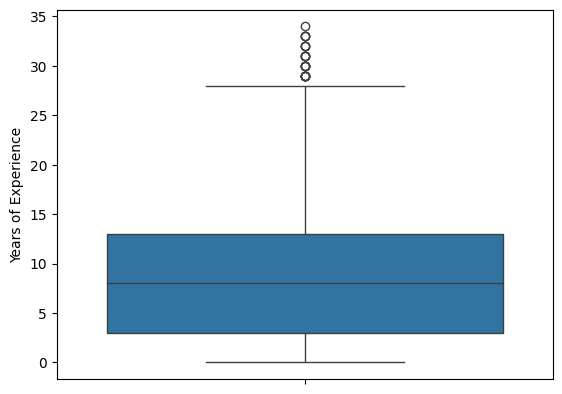

In [14]:
# outliers in the data
sns.boxplot(df['Years of Experience'])

In [15]:
# drop the values above 25 years of experience
df = df[df['Years of Experience'] < 25]

## 📊 Summary Statistics
Using `.describe()` to get numerical summaries of the dataset.

In [16]:
df.describe()

,Age,Years of Experience,Salary
count,1733.000000,1733.000000,1733.000000
mean,34.579342,8.566647,110975.894980
std,7.676121,6.049238,50753.953728
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,65000.000000
50%,33.000000,7.000000,110000.000000
75%,40.000000,13.000000,151310.000000
max,62.000000,24.000000,250000.000000


In [24]:
# label encode all catecorical columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Education Level'] = le.fit_transform(df['Education Level'])
df['Job Title'] = le.fit_transform(df['Job Title'])


In [25]:
df.Age

,Age
0,32.0
1,28.0
2,45.0
3,36.0
4,52.0
...,...
6623,43.0
6624,27.0
6625,33.0
6628,37.0


##Salary is highly correlated with years of experience feature thats why we will do predictions only on the basis of of it.

## 📊 Visualization
Using Matplotlib/Seaborn for insightful data visualizations.

In [3]:
# plot heatmap
sns.heatmap(df.corr(), annot=True)

NameError: name 'sns' is not defined

In [27]:
X = df['Years of Experience']

y= df['Salary']



## 📊 Visualization
Using Matplotlib/Seaborn for insightful data visualizations.

In [2]:
# plot between X and y
plt.scatter(X, y)

NameError: name 'plt' is not defined

In [1]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ModuleNotFoundError: No module named 'sklearn'

In [30]:
# training the linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(np.array(X_train).reshape(-1, 1), y_train)

LinearRegression()

In [31]:
# evaluating the model
from sklearn.metrics import r2_score
y_pred = lr.predict(np.array(X_test).reshape(-1, 1))
r2_score(y_test, y_pred)

0.6544017619659037

## 📊 Visualization
Using Matplotlib/Seaborn for insightful data visualizations.

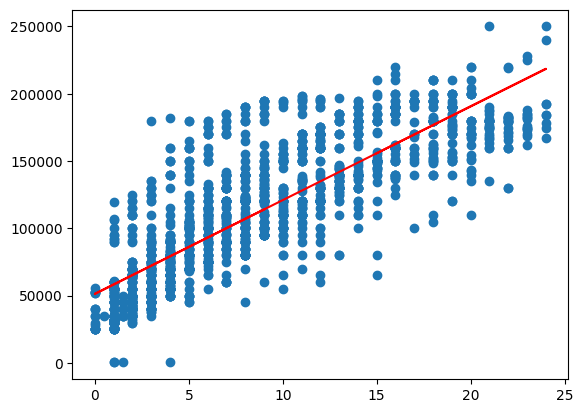

In [32]:
# drawing regression line on the graph
plt.scatter(X, y)
plt.plot(np.array(X_train).reshape(-1, 1), lr.predict(np.array(X_train).reshape(-1, 1)), color='red')
